In [49]:
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar as colorbar
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [18]:
#Importing the dataset
csvfile = "C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe/92dataNS.csv"
df = pd.read_csv(csvfile)

df.head(3)

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,pca1,pca2,cluster
0,강원도,강릉시,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.574215,...,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,0.968103,1.247207,0
1,강원도,고성군,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.361909,...,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,1.511238,0.204216,2
2,강원도,동해시,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.106700,...,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,0.784858,-0.294025,2


In [19]:
df['지역'] = df['광역시도']+df['시군구명']
df.head(3)

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,pca1,pca2,cluster,지역
0,강원도,강릉시,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.574215,...,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,0.968103,1.247207,0,강원도강릉시
1,강원도,고성군,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.361909,...,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,1.511238,0.204216,2,강원도고성군
2,강원도,동해시,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.106700,...,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,0.784858,-0.294025,2,강원도동해시


In [20]:
df.drop(columns=['광역시도','시군구명'],axis=1, inplace=True)

In [21]:
col1=df.columns[-1:].to_list()
col2=df.columns[:-1].to_list()
new_col=col1+col2
dataset=df[new_col]
dataset.head(3)

,지역,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,...,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,pca1,pca2,cluster
0,강원도강릉시,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,...,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,0.968103,1.247207,0
1,강원도고성군,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,...,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,1.511238,0.204216,2
2,강원도동해시,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,...,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,0.784858,-0.294025,2


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   지역                 92 non-null     object 
 1   기타관광               92 non-null     float64
 2   레저스포츠              92 non-null     float64
 3   문화관광               92 non-null     float64
 4   쇼핑                 92 non-null     float64
 5   자연관광               92 non-null     float64
 6   역사.체험관광            92 non-null     float64
 7   총 관광지 수            92 non-null     float64
 8   도시비율               92 non-null     float64
 9   임야면적 비율            92 non-null     float64
 10  농업용지 비율            92 non-null     float64
 11  해면비율               92 non-null     float64
 12  육지 도시화 정도          92 non-null     float64
 13  해면 도시화 정도          92 non-null     float64
 14  도시지역 인구 (명)        92 non-null     float64
 15  1인당 주거지역 (㎡)       92 non-null     float64
 16  1인당 상업지역 (㎡)       92 non-nu

In [22]:
data = dataset.iloc[:,1:-3]
data

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
## 알고리즘 돌리기 위해 데이터 확인 
data.shape

(92, 33)

시작시간: 2023-11-10 11:54:59.156662 



C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



종료시간: 2023-11-10 11:55:43.392843 
총 소요시간: 0 days 00:00:44.236181


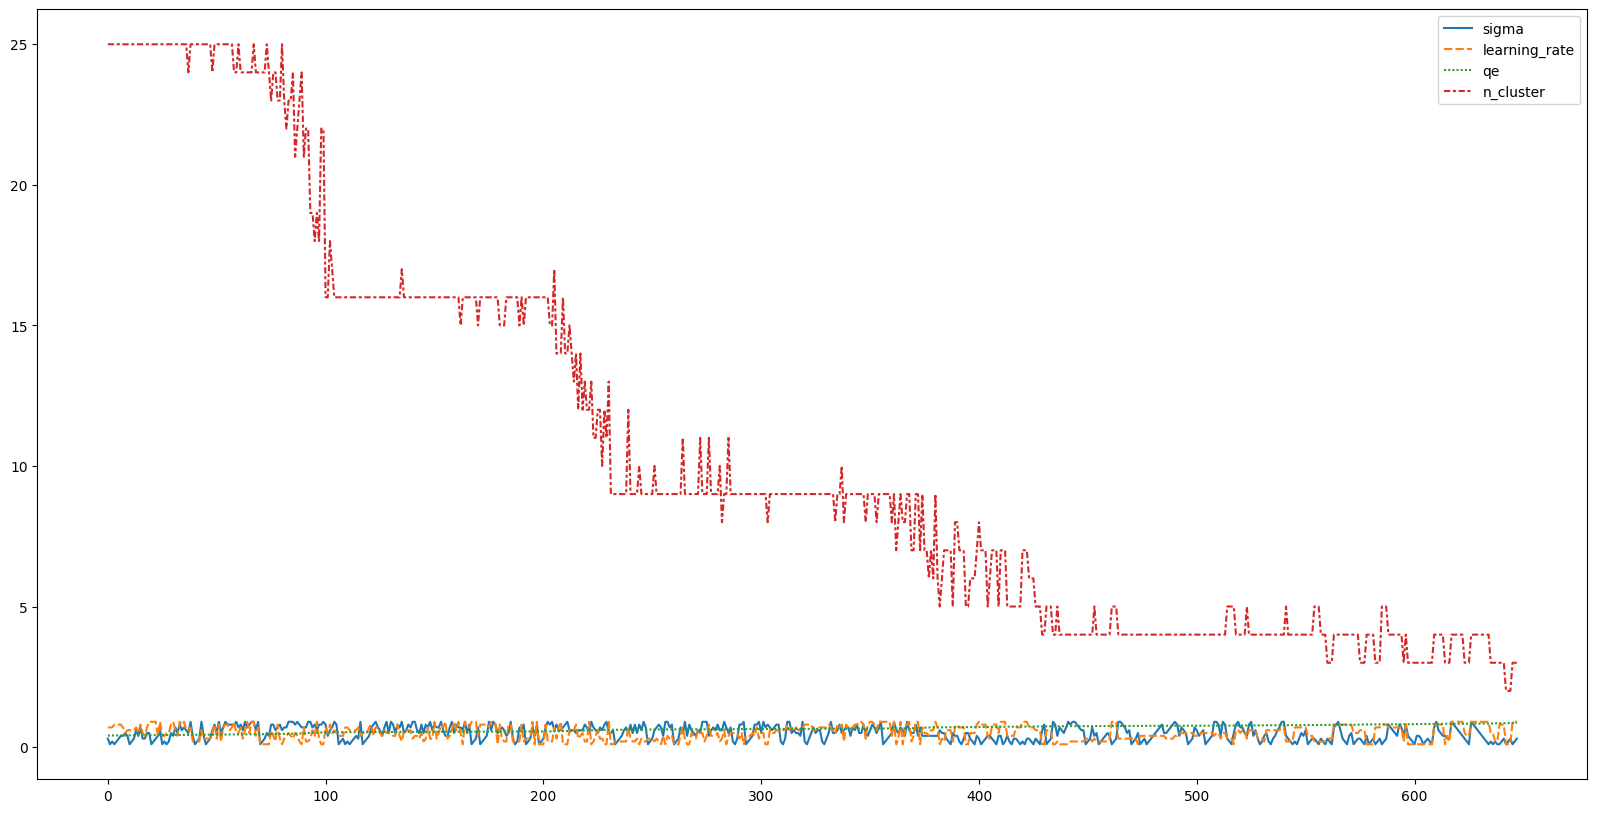

In [26]:
s_time = pd.Timestamp.now()
print('시작시간:',s_time,'\n')

#원하는 파라미터 조합 리스트화
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]

#결과 값을 담을 리스트 res 생성
res = []
#모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            
            try:
                #랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,33,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=0)
                estimator.random_weights_init(data.values)
                estimator.train(data.values,1000,random_order=True)
                qe = estimator.quantization_error(data.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in data.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])

                #pca로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,33,sigma =sigma, learning_rate = lr,topology='hexagonal', random_seed=0)
                estimator.pca_weights_init(data.values)
                estimator.train(data.values,1000,random_order=True)
                qe = estimator.quantization_error(data.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in data.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'pca_init',qe,len(np.unique(cluster_index))])
                
            except ValueError as e:
                print(e)
            
#결과 데이터프레임 생성 및 sorting 
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 
df_res.shape
df_res.sort_values(by=['qe'],ascending=True,inplace=True,ignore_index=True)
df_res.head(10)

#시각화를 위한 lineplot 생성
plt.figure(figsize=(20,10))
sns.lineplot(data = df_res)

e_time = pd.Timestamp.now()
print('\n종료시간:',e_time,'\n총 소요시간:',e_time-s_time)

In [27]:
df_res.head(10)

,map_size,sigma,learning_rate,init_method,qe,n_cluster
0,5x5,0.3,0.7,random_init,0.411225,25
1,5x5,0.1,0.7,random_init,0.411282,25
2,5x5,0.2,0.7,random_init,0.411282,25
3,5x5,0.1,0.8,random_init,0.411486,25
4,5x5,0.2,0.8,random_init,0.411486,25
5,5x5,0.3,0.8,random_init,0.411490,25
6,5x5,0.4,0.8,random_init,0.412439,25
7,5x5,0.4,0.7,random_init,0.414744,25
8,5x5,0.5,0.5,random_init,0.416836,25
9,5x5,0.4,0.6,random_init,0.418250,25


In [32]:
df_res['n_cluster'].unique()

array([25, 24, 23, 22, 21, 19, 18, 16, 17, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2], dtype=int64)

In [36]:
df_res.loc[df_res['n_cluster'] == 9]

,map_size,sigma,learning_rate,init_method,qe,n_cluster
231,3x3,0.5,0.1,random_init,0.614060,9
232,3x3,0.6,0.1,random_init,0.615667,9
233,3x3,0.1,0.2,random_init,0.617263,9
234,3x3,0.2,0.2,random_init,0.617264,9
235,3x3,0.3,0.2,random_init,0.617308,9
...,...,...,...,...,...,...
368,3x3,0.6,0.9,random_init,0.672923,9
371,3x3,0.8,0.9,random_init,0.673881,9
372,4x4,0.4,0.9,pca_init,0.674015,9
374,5x5,0.4,0.7,pca_init,0.681237,9


In [57]:
## 모델 파라미터 설정
som_b2 = MiniSom(5,5,33,sigma=0.3,learning_rate=0.7,topology='hexagonal',neighborhood_function='gaussian',activation_distance='euclidean', random_seed=0)
#초기값설정
som_b2.pca_weights_init(data.values)
som_b2.train(data.values,1000,random_order=True)

#평가
som_b2.quantization_error(data.values)
#som_b2.topographic_error(data.values)

0.7103860386825265

In [58]:
som_b2.topographic_error(data.values)

0.5326086956521738

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_legend'

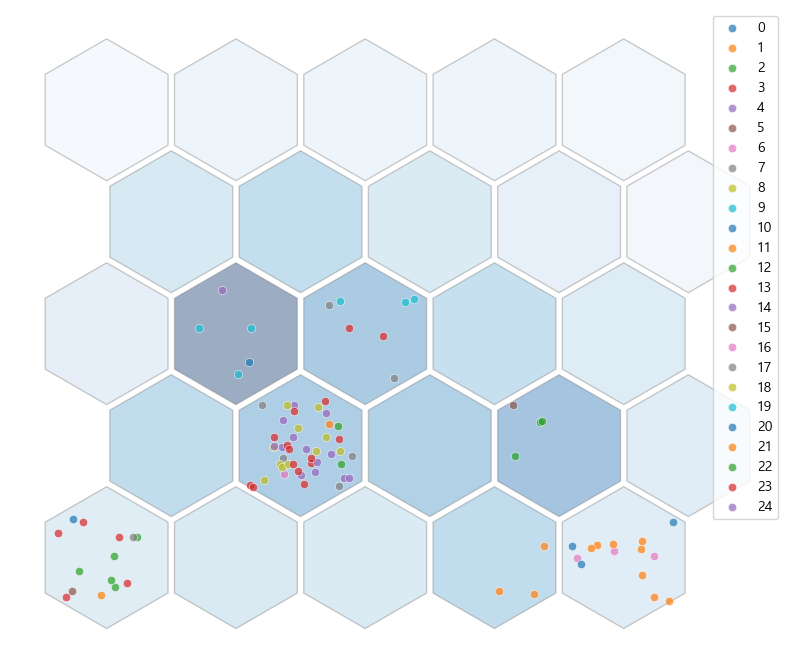

In [60]:
from matplotlib import cm
##
xx, yy = som_b2.get_euclidean_coordinates()
umatrix = som_b2.distance_map()
weights = som_b2.get_weights()

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

##추가한 항목
# labels[labels =='0'] = 0
# labels[labels =='1'] = 1
# labels[labels =='2'] = 2
# labels[labels =='3'] = 3
# labels[labels =='4'] = 4
# labels[labels =='5'] = 5
# labels[labels =='6'] = 6
# labels[labels =='7'] = 7
# labels[labels =='8'] = 8
marker = ['o', 'v', '1','3','8','s','p','x','D','*']

# iteratively add hexagons
# plotting the distance map as background
# 해당 셀과 다른 이웃들 간 거리를 표현, 밝을수록 가깝고, 어두울수록 멀다
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        plot = ax.add_patch(hex)

# output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in data.values[cluster_index==c]]
        y_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in data.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ , markers= marker, label=str(c),alpha=.7)
#         plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
#         plot = sns.scatterplot( x = x_,  y= y_ , marker[labels[cnt]],alpha=.7).get_lengend().remove()
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])
        
#시각화 용이하게 그래프 변경

# plt.gca().axes.axis.set_visible(False)
# plt.gca().axes.yxis.set_visible(False)
# plt.get_lengend().remove()
plt.axis('off')
plt.get_legend().remove()




#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
df_cnt

#x축,y축 간격 설정 
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

#차트 우측에 color bar생성
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                           orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
plot = cb1.ax.set_ylabel('distance from neurons in the neighborhood',
                 rotation=270, fontsize=16)
plot = plt.gcf().add_axes(ax_cb)



#이미지 저장
#plt.savefig('som_seed_hex.png')

In [55]:
df_cnt

,cluster이름,개수
0,0,1
1,1,2
2,2,3
3,3,9
4,4,2
5,5,1
6,6,6
7,7,1
8,8,3
9,9,3
